In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, "figure.figsize": (6.0, 4.0)}
%matplotlib inline

import abtem
import ase
import matplotlib.pyplot as plt
from ase.io import read

(examples:saed_quickstart)=
# SAED quickstart

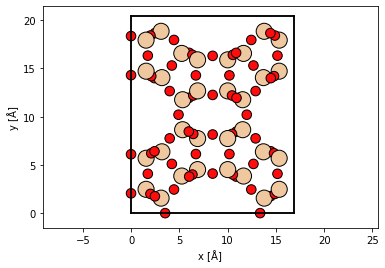

In [2]:
atoms = read("../../data/SiO2_zeolite.cif")

cell = atoms.cell.copy()

atoms *= (1,1,5)

abtem.show_atoms(atoms, plane="xy");

In [3]:
frozen_phonons = abtem.FrozenPhonons(atoms, 1, sigmas= 0.078)

In [5]:
potential = abtem.Potential(
    frozen_phonons,
    gpts=768,
    projection="infinite",
    slice_thickness=2,
    exit_planes=10,
)

In [21]:
wave = abtem.PlaneWave(energy=100e3)
wave.grid.match(potential)

In [47]:
measurement = wave.multislice(potential).diffraction_patterns(max_angle=20, block_direct=True).mean(0)

measurement.compute()

[########################################] | 100% Completed | 1.97 ss


In [49]:
spots = measurement[-1].index_diffraction_spots(cell=cell).remove_low_intensity(.05)

(<Figure size 432x288 with 2 Axes>,
 <Axes: xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

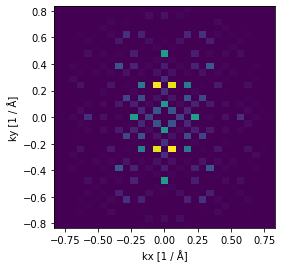

In [30]:
measurement[-1].show()

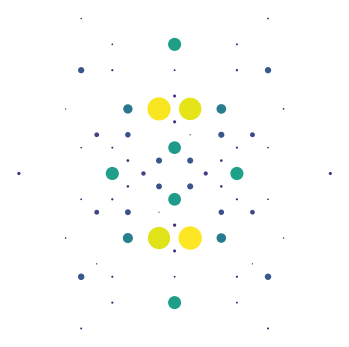

In [52]:
fig, ax = spots.show(spot_scale=.5, overlay_indices=False)
ax.axis("off")
plt.savefig("../thumbnails/saed_quickstart.png", bbox_inches="tight", pad_inches=0)